In [ ]:
'''
Drawing from:
https://github.com/mataquatro/stats-overview/blob/master/knn.py
https://github.com/FrankRuns/Thinkful/blob/master/Unit4/KMeans/kmeans.py
'''

In [ ]:
'''
Questions:
- How to show labels for c colors in scatterplots
- How is sub_df = df.sort(['dist'])[:k] getting nearest neighbors, isn't it just going in one 
direction from the k value point?
'''

In [22]:
## Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.neighbors import DistanceMetric as dm
import collections

In [10]:
## Read in data
iris = pd.read_csv("/Users/fred/Dropbox/Thinkful/iris.csv")
# Make Species a categorical varaible
iris['Species'] = pd.Categorical(iris['Species']).labels

/Users/fred/anaconda/lib/python2.7/site-packages/pandas/core/categorical.py:396: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  warnings.warn("'labels' is deprecated. Use 'codes' instead", FutureWarning)


In [11]:
iris
iris.columns
iris.dtypes


SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species           int8
dtype: object

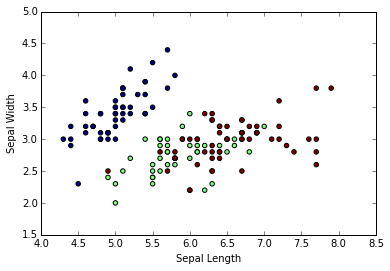

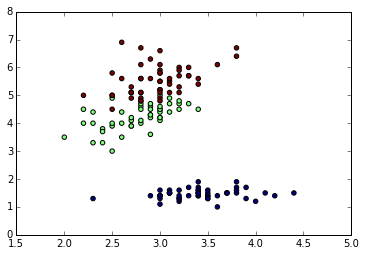

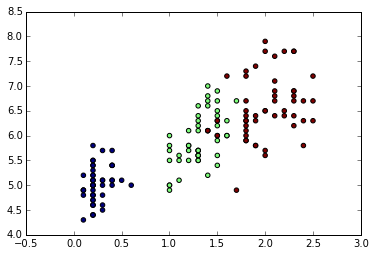

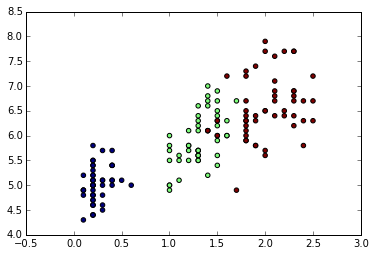

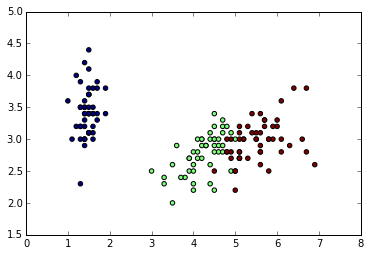

In [18]:
plt.scatter(iris['SepalLength'], iris['SepalWidth'], c=iris['Species'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
plt.scatter(iris['SepalWidth'], iris['PetalLength'], c=iris['Species'])
plt.show()
plt.scatter(iris['PetalWidth'], iris['SepalLength'], c=iris['Species'])
plt.show()
plt.scatter(iris['PetalWidth'], iris['SepalLength'], c=iris['Species'])
plt.show()
plt.scatter(iris['PetalLength'], iris['SepalWidth'], c=iris['Species'])
plt.show()

In [25]:
## create a new by generating random values for sepal length and width
rand_SL = random.uniform(4.0, 8.5) # pretty sure numbers set range
rand_SW = random.uniform(1.5, 5.0)
print rand_SL, rand_SW

4.66623667248 2.62633724395


In [35]:
## Calculate Euclidean distance from random point
d_list = []
dist = dm.get_metric('euclidean')
for i,row in enumerate(range(len(df))):
    d_list.append(dist.pairwise([[rand_SL, rand_SW], [iris['SepalLength'][i], iris['SepalWidth'][i]]])[0][1])

df['dist'] = d_list
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,dist
0,5.1,3.5,1.4,0.2,Iris-setosa,0.975416
1,4.9,3.0,1.4,0.2,Iris-setosa,0.440760
2,4.7,3.2,1.3,0.2,Iris-setosa,0.574655
3,4.6,3.1,1.5,0.2,Iris-setosa,0.478272
4,5.0,3.6,1.4,0.2,Iris-setosa,1.029280


In [50]:
## Function takes k as arg and returns majority class for k points
def knn(k):
    # Isolate nearest neighbors
    sub_df = df.sort(['dist'])[:k] # how exactly is this slicing?
    pass

    # Identifying majority class
    # Create counter
    class_count = collections.Counter()
    for n in list(sub_df['Species']):
        class_count[n] += 1
        
    # Find key with max val
    for key in class_count.keys():
        if class_count[key] == max(class_count.values()):
            print key, "is the majority fo the class subset."
            print "%s has %d of the %d points in the subset." % (key, max(class_count.values()), k)

    
kvals = int(raw_input("Input a value for k: "))
knn(kvals)

Input a value for k: 8
Iris-setosa is the majority fo the class subset.
Iris-setosa has 5 of the 8 points in the subset.
